In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


## Data loading

In [5]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m pip install --upgrade pip


In [7]:
import pandas as pd
import json

In [8]:
file_path = '/Users/victoriavu25/btt_data/yelp_academic_dataset_business.json'

df = pd.read_json(file_path, lines=True)  # Assuming each line is a separate JSON object
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Get information about the DataFrame (e.g., column types)



              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

# Exploratory Analysis

In [10]:
df = df[df['city'] == 'Philadelphia']

In [11]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [12]:
df.head(10)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
76,-4dYswJy7SPcbcERvitmIg,Pathmark,3021 Grays Ferry Ave,Philadelphia,PA,19146,39.940403,-75.193297,2.5,34,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Food, Grocery","{'Monday': '6:0-1:0', 'Tuesday': '6:0-1:0', 'W..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
84,eMjnw_7wp-CscyNh6Lu0ZA,AM&PM Locksmith,8540 Bustleton Ave,Philadelphia,PA,19152,40.072330,-75.048483,4.5,58,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Keys & Locksmiths, Home Services, Local Services","{'Monday': '6:0-3:0', 'Tuesday': '6:0-3:0', 'W..."
115,xfmkEGiIERBaBMLhw-dTCg,Walmart Vision & Glasses,1675 S Christopher Columbus Blvd,Philadelphia,PA,19148,39.919809,-75.157803,4.5,6,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Eyewear & Opticians, Shopping","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


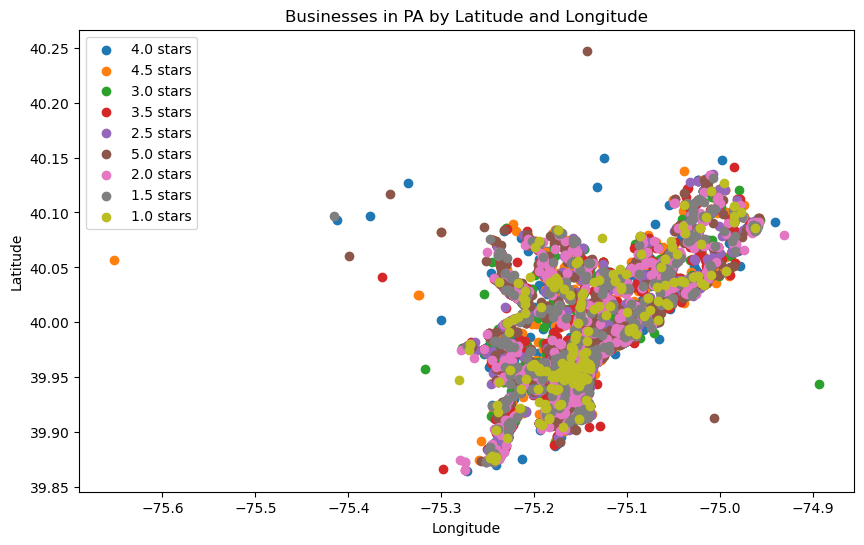

In [13]:
# prompt: plot df by latitude and longitude and cluster by star count

import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' are columns in your DataFrame
plt.figure(figsize=(10, 6))
for stars in df['stars'].unique():
  subset = df[df['stars'] == stars]
  plt.scatter(subset['longitude'], subset['latitude'], label=f'{stars} stars')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Businesses in PA by Latitude and Longitude')
plt.legend()
plt.show()


# Plotting distrubtion of stars


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
stars = df['stars']
stars

3         4.0
15        4.0
19        4.5
28        4.0
31        3.0
         ... 
150320    2.0
150326    3.0
150329    3.0
150334    4.5
150336    4.5
Name: stars, Length: 14569, dtype: float64

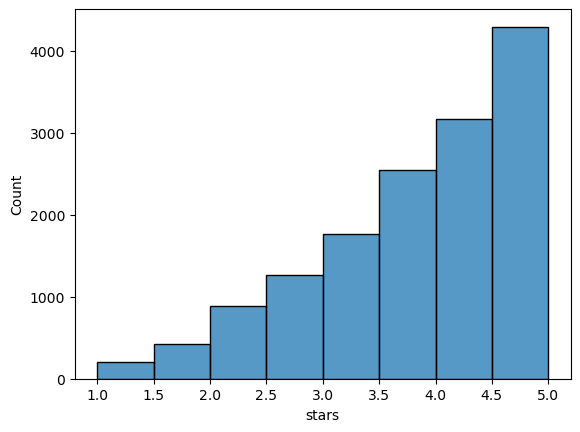

In [17]:
# prompt: show ratings up to 0.5

import matplotlib.pyplot as plt
sns.histplot(stars, binwidth=0.5)
plt.show()


In [18]:
categories = df['categories']
categories

3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
15                        Sushi Bars, Restaurants, Japanese
19                                      Korean, Restaurants
28        Cocktail Bars, Bars, Italian, Nightlife, Resta...
31                          Pizza, Restaurants, Salad, Soup
                                ...                        
150320                  Fashion, Shopping, Women's Clothing
150326               Real Estate, Apartments, Home Services
150329          Day Spas, Beauty & Spas, Skin Care, Massage
150334    Health & Medical, Yoga, Shopping, Naturopathic...
150336                                 Restaurants, Mexican
Name: categories, Length: 14569, dtype: object

In [19]:
# prompt: show most common categories

from collections import Counter

# Assuming 'categories' is a Series where each element is a string of comma-separated categories
all_categories = []
for cat_string in categories.dropna():  # Remove missing values
  all_categories.extend(cat_string.split(', '))

category_counts = Counter(all_categories)
top_categories = category_counts.most_common(50)  # Get top 10

for category, count in top_categories:
  print(f"{category}: {count}")


Restaurants: 5852
Food: 3105
Shopping: 2091
Nightlife: 1463
Beauty & Spas: 1320
Bars: 1293
Home Services: 1151
Local Services: 1013
Health & Medical: 984
Sandwiches: 929
Coffee & Tea: 894
Event Planning & Services: 819
Pizza: 800
American (New): 751
Breakfast & Brunch: 686
Automotive: 665
American (Traditional): 663
Active Life: 643
Arts & Entertainment: 595
Fashion: 535
Hair Salons: 532
Italian: 505
Specialty Food: 482
Chinese: 471
Nail Salons: 395
Hotels & Travel: 392
Real Estate: 376
Professional Services: 375
Bakeries: 373
Fast Food: 367
Home & Garden: 364
Burgers: 363
Seafood: 359
Fitness & Instruction: 353
Desserts: 344
Grocery: 329
Cafes: 323
Auto Repair: 322
Mexican: 315
Delis: 308
Caterers: 294
Salad: 280
Hair Removal: 276
Doctors: 272
Beer: 257
Wine & Spirits: 257
Pets: 257
Venues & Event Spaces: 244
Chicken Wings: 240
Japanese: 237


In [20]:
# prompt: take out all of the items in each categories with pandas

all_categories = []
for index in df.index:
  temp = df.categories[index]
  if type(temp) == str:
    temp = temp.split(';')
    all_categories.extend(temp)
all_categories = set(all_categories)



In [21]:
len(all_categories)

10235

In [22]:

all_categories

{'Endodontists, Health & Medical, Dentists, General Dentistry, Cosmetic Dentists',
 'Bars, Nightlife',
 'Sandwiches, Restaurants, Pizza, Italian, Salad',
 'Auto Customization, Auto Parts & Supplies, Auto Repair, Automotive',
 'Cafes, Coffee & Tea, Food, Specialty Food, Health Markets, Restaurants, Juice Bars & Smoothies',
 'Pizza, Restaurants, Nightlife, Italian, Bars, Gelato, Food, Wine Bars',
 'Bike Repair/Maintenance, Bikes, Local Services, Shopping, Sporting Goods',
 'Pizza, Pretzels, Food, Ice Cream & Frozen Yogurt, Restaurants, American (New)',
 'Soul Food, Seafood, Caterers, Comfort Food, Restaurants, Event Planning & Services',
 'Accessories, Watch Repair, Jewelry, Local Services, Fashion, Shopping, Jewelry Repair',
 "Shopping, Fashion, Women's Clothing, Accessories, Shoe Stores",
 'Restaurants, Middle Eastern, Falafel, Bakeries, Food, Greek, Mediterranean',
 'Grocery, Fashion, Shopping, Department Stores, Food, Discount Store, Electronics, Drugstores, Mobile Phones',
 'Lingeri

In [23]:
# prompt: filter the data frame to only include resturants and food related shops and save it to a new data frame

import pandas as pd
# Create a list of relevant categories
food_categories = ['Restaurants', 'Food', 'Coffee & Tea', 'Fast Food', 'Sandwiches', 'Pizza', 'Burgers',
                   'American (Traditional)', 'Mexican', 'Chinese', 'Italian', 'Breakfast & Brunch',
                   'Cafes', 'Seafood', 'Sushi Bars', 'Barbeque', 'Indian', 'Thai', 'Greek']

# Filter the DataFrame
df_food = df[df['categories'].apply(lambda x: any(cat in str(x) for cat in food_categories) if pd.notna(x) else False)]


In [24]:
df_food.shape

(7104, 14)

In [25]:
df.shape

(14569, 14)

In [26]:
df_food.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
76,-4dYswJy7SPcbcERvitmIg,Pathmark,3021 Grays Ferry Ave,Philadelphia,PA,19146,39.940403,-75.193297,2.5,34,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Food, Grocery","{'Monday': '6:0-1:0', 'Tuesday': '6:0-1:0', 'W..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
130,3BJxm-HnvzdwD1zjmSbmyQ,Golden Chopstick Chinese Restaurant,1800 Spring Garden St,Philadelphia,PA,19130,39.963078,-75.168027,3.0,137,1,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Restaurants, Chinese","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:30',..."
151,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107,39.947033,-75.157434,4.5,72,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."


In [27]:
# prompt: attributes is a dict in df, write a function to show me all the unique attribute keys

def get_unique_attribute_keys(df):
  """
  Extracts all unique attribute keys from a DataFrame with a 'attributes' column containing dictionaries.

  Args:
    df: Pandas DataFrame with an 'attributes' column.

  Returns:
    A set of unique attribute keys.
  """
  all_keys = set()
  for attributes in df['attributes'].dropna():
    if isinstance(attributes, dict):
      all_keys.update(attributes.keys())
  return all_keys

# Get the unique attribute keys
unique_keys = get_unique_attribute_keys(df)
unique_keys


{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [28]:
# for filtering
resturant_attirbutes = ['Caters', 'DriveThru', 'DietaryRestrictions',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut'
]

In [29]:
len(get_unique_attribute_keys(df_food))

38

In [30]:
len(get_unique_attribute_keys(df))

39

In [31]:
# prompt: check if any item in df has no attirbutes show me which ones

# Find rows with missing attributes
missing_attributes = df[df['attributes'].isnull()]

# Display the indices of rows with missing attributes
print(missing_attributes.index)


Index([   239,    288,    301,    632,    641,    789,    914,    996,   1071,
         1111,
       ...
       149467, 149655, 149710, 149772, 149883, 149890, 149893, 149991, 150045,
       150295],
      dtype='int64', length=1170)


In [32]:
missing_attributes

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
239,D9Xez9uOSM4DgSjSTywq7w,King of Jewelers,737 Samson St,Philadelphia,PA,19106,39.948902,-75.153854,4.0,5,1,None,"Shopping, Jewelry","{'Monday': '9:0-18:30', 'Tuesday': '9:0-18:30'..."
288,usv5G5cO314pPHRTGq2Eyw,Best Tours,,Philadelphia,PA,19019,40.119713,-75.009710,1.0,38,1,None,"Tours, Walking Tours, Hotels & Travel, Food Tours",None
301,e8pMCk4bE0U4qk7z59Lxkg,Federal Donuts,2101 Pennsylvania Ave,Philadelphia,PA,19130,39.963042,-75.174186,4.5,11,1,None,"Sandwiches, Chicken Wings, Restaurants, Donuts...","{'Monday': '8:0-15:0', 'Tuesday': '8:0-15:0', ..."
632,rh3C_JK4NAoUJ-HNStvHtw,"Historic Philadelphia, Inc","600 Walnut St, Ste 130",Philadelphia,PA,19106,39.948321,-75.151952,4.5,5,1,None,"Hotels & Travel, Tours",None
641,wR8V8u3_wv-yjR-CIHyY0Q,The Collins Apartments,1125 Sansom St,Philadelphia,PA,19107,39.949918,-75.160004,4.0,10,1,None,"Real Estate, Home Services, Apartments","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149890,OoLikm3s7psgqwp8KUa4VA,Alb Granite,2120 Herbert St,Philadelphia,PA,19124,40.011295,-75.076036,2.5,8,1,None,"Home Services, Contractors","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
149893,hzX8Zrsxge4PXXKs_XAeqA,Can Tho City,3600 Spruce St,Philadelphia,PA,19104,39.950506,-75.195192,4.0,10,1,None,"Vietnamese, Restaurants, Breakfast & Brunch, S...",None
149991,GsLg3ZOgxxYoMMK9vlDtzA,The Living Room,701 South 5th St,Philadelphia,PA,19147,39.940289,-75.150878,4.0,9,0,None,"Asian Fusion, Restaurants",None
150045,cU-X7l15e-yI2YCsfCGaJQ,Success Auto Tags,151 N 9th St,Philadelphia,PA,19107,39.954901,-75.154242,4.0,8,1,None,"Auto Parts & Supplies, Education, Public Servi...",None


## Looking at this we can assume that we can use the restaurant attributes and restaurant tags to filter out which store is a restaurant, it might be a rough estimate but we can do more intense filtering later


In [34]:
# prompt: make a dataframe called df_attributes that has all the items that has any of the attributes listed in resturant_attirbutes

# Filter the DataFrame based on the presence of any of the restaurant attributes
df_attributes = df_food[df_food['attributes'].apply(lambda x: any(key in x for key in resturant_attirbutes) if isinstance(x, dict) else False)]


In [35]:
unique_keys = get_unique_attribute_keys(df_attributes)
unique_keys

{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [36]:
df_attributes.shape

(6876, 14)

In [37]:
df_food.shape

(7104, 14)

In [38]:

df_attributes.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [39]:
# prompt: show the first restaurant's entire attribute column

# restaurantsDelivery, outdoorseating, businessacceptscreditcards, bikeparking, restauranttakeout, byappointmentonly, caters TRUE OR FALSE
# businessparking, restaurantpricerange2, wifi, alcohol HARDER

print(df_attributes['attributes'].iloc[0])
print(df_attributes['attributes'].iloc[1])


{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': "u'free'", 'Alcohol': "u'none'", 'Caters': 'True'}
{'RestaurantsReservations': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsAttire': "'casual'", 'BusinessAcceptsCreditCards': 'True', 'WiFi': "'free'", 'HasTV': 'False', 'RestaurantsTakeOut': 'True', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}", 'GoodForKids': 'False', 'GoodForMeal': "{'dessert': True, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}", 'NoiseLevel': "u'average'", 'RestaurantsPriceRange2': '2', 'Alcohol': "'full_bar'", 'DogsAllo

In [40]:
# prompt: combine both df_food and df_attributes and drop all duplicate business_id

import pandas as pd
combined_df = pd.concat([df_food, df_attributes]).drop_duplicates(subset=['business_id'])
print(combined_df.shape)


(7104, 14)


In [41]:
# prompt: save combined_df into json with spacing

combined_df.to_json('combined_df.json', orient='records', indent=2)


In [42]:
# Initialize an empty dictionary to store unique attribute values
att_uniq_combined = {}

# Iterate over the 'attributes' column in combined_df
for att in combined_df['attributes']:
    if att is None:
        continue
    for key, value in att.items():
        # Initialize the key in the dictionary if not already present
        if key not in att_uniq_combined:
            att_uniq_combined[key] = set()

        # Check if the value is a type that can be added to the set (e.g., string, list, or others)
        if isinstance(value, (str, list)):  # Modify the check as needed
            if isinstance(value, str):
                att_uniq_combined[key].add(value)  # Add the string value directly
            else:
                att_uniq_combined[key].update(value)  # Add list values to the set
        else:
            # Add other types (e.g., boolean or numerical values) directly to the set
            att_uniq_combined[key].add(value)

# Print the resulting unique attribute values for each key
att_uniq_combined


{'RestaurantsDelivery': {'False', 'None', 'True'},
 'OutdoorSeating': {'False', 'None', 'True'},
 'BusinessAcceptsCreditCards': {'False', 'None', 'True'},
 'BusinessParking': {'None',
  "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': True}",
  "{'garage': False, 'street': False, 'validated': False, 'lot': None, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': True}",
  "{'garage': False, 'street': False, 'validated': None, 'lot': False, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': None, 'lot': None, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': None, 'lot': True, 'valet': False}",
  "{'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}",
  "{'garage': Fal

# Feature Engineering

In [44]:
# Enhanced function to clean values by removing 'u' prefix, extra single quotes, and treating 'None' as None
def clean_value(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespace
        # Remove the "u'" prefix if present
        if value.startswith("u'"):
            value = value[2:]
        # Remove extra single quotes if present
        value = value.strip("'")
        # Convert string 'None' to Python None
        if value.lower() == 'none':
            return None
    return value

# Create new columns for each unique attribute key
for key in att_uniq_combined:
    combined_df[key] = None

# Iterate through the DataFrame and populate the new columns
for index, row in combined_df.iterrows():
    attributes = row['attributes']
    if attributes:
        for key, value in attributes.items():
            if key in att_uniq_combined:
                clean_val = clean_value(value)
                # Assign the cleaned value to the corresponding column
                combined_df.loc[index, key] = clean_val

# Print the unique values for cleaned columns to verify
print(combined_df['BYOBCorkage'].unique())  # Expected: [None, 'no', 'yes_corkage', 'yes_free']
print(combined_df['Alcohol'].unique())      # Expected: [None, 'beer_and_wine', 'full_bar', 'none']

# Optionally, print the updated DataFrame
print(combined_df.head())


[None 'yes_free' 'yes_corkage' 'no']
[None 'full_bar' 'beer_and_wine']
               business_id                name        address          city  \
3   MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries    935 Race St  Philadelphia   
15  MUTTqe8uqyMdBl186RmNeA            Tuna Bar    205 Race St  Philadelphia   
19  ROeacJQwBeh05Rqg7F6TCg                 BAP  1224 South St  Philadelphia   
28  QdN72BWoyFypdGJhhI5r7g             Bar One   767 S 9th St  Philadelphia   
31  Mjboz24M9NlBeiOJKLEd_Q    DeSandro on Main   4105 Main St  Philadelphia   

   state postal_code   latitude  longitude  stars  review_count  ...  \
3     PA       19107  39.955505 -75.155564    4.0            80  ...   
15    PA       19106  39.953949 -75.143226    4.0           245  ...   
19    PA       19147  39.943223 -75.162568    4.5           205  ...   
28    PA       19147  39.939825 -75.157447    4.0            65  ...   
31    PA       19127  40.022466 -75.218314    3.0            41  ...   

    BestNights DriveT

In [45]:
pd.set_option('display.max_columns', None)
print(combined_df.iloc[1000])

business_id                                              Tk5UxXWUcBog8_oOcH_gzw
name                                                       Iron Tower Deli Shop
address                                                             56 N 9th St
city                                                               Philadelphia
state                                                                        PA
postal_code                                                               19107
latitude                                                              39.952425
longitude                                                            -75.154936
stars                                                                       3.5
review_count                                                                 20
is_open                                                                       0
attributes                    {'RestaurantsReservations': 'True', 'BusinessA...
categories                              

In [46]:
check_df = combined_df.copy()
# List of columns to standardize from true, false, None to true and false
tfn_columns = [
    'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking',
    'RestaurantsTakeOut', 'Caters', 'WheelchairAccessible', 'GoodForKids',
    'RestaurantsReservations', 'RestaurantsGoodForGroups', 'HasTV', 'DogsAllowed',
    'HappyHour', 'RestaurantsTableService', 'BYOB', 'BusinessAcceptsBitcoin',
    'DriveThru', 'Corkage', 'ByAppointmentOnly', 'GoodForDancing',
    'CoatCheck', 'Open24Hours', 'AgesAllowed', 'AcceptsInsurance',
    'RestaurantsCounterService'
]


# Standardize values in the specified columns in check_df. change it to boolean true and false
for column in tfn_columns:
    check_df[column] = check_df[column].apply(lambda x: True if str(x).lower() == 'true' else False)


In [47]:
#further verify that merging false and none values did not mess with the true values
for column in tfn_columns:
    true_count = combined_df[column].apply(lambda x: x == 'True').sum()  # Count only True values
    print(f"Number of True values in '{column}': {true_count}")

Number of True values in 'RestaurantsDelivery': 3870
Number of True values in 'OutdoorSeating': 2026
Number of True values in 'BusinessAcceptsCreditCards': 5752
Number of True values in 'BikeParking': 3595
Number of True values in 'RestaurantsTakeOut': 5695
Number of True values in 'Caters': 2272
Number of True values in 'WheelchairAccessible': 1312
Number of True values in 'GoodForKids': 3430
Number of True values in 'RestaurantsReservations': 1745
Number of True values in 'RestaurantsGoodForGroups': 3658
Number of True values in 'HasTV': 3143
Number of True values in 'DogsAllowed': 263
Number of True values in 'HappyHour': 984
Number of True values in 'RestaurantsTableService': 1265
Number of True values in 'BYOB': 180
Number of True values in 'BusinessAcceptsBitcoin': 18
Number of True values in 'DriveThru': 158
Number of True values in 'Corkage': 82
Number of True values in 'ByAppointmentOnly': 39
Number of True values in 'GoodForDancing': 62
Number of True values in 'CoatCheck': 8

In [48]:
#yes its true
for column in tfn_columns:
    true_count = check_df[column].sum()  # Sum works because True is treated as 1
    print(f"Number of True values in '{column}': {true_count}")


Number of True values in 'RestaurantsDelivery': 3870
Number of True values in 'OutdoorSeating': 2026
Number of True values in 'BusinessAcceptsCreditCards': 5752
Number of True values in 'BikeParking': 3595
Number of True values in 'RestaurantsTakeOut': 5695
Number of True values in 'Caters': 2272
Number of True values in 'WheelchairAccessible': 1312
Number of True values in 'GoodForKids': 3430
Number of True values in 'RestaurantsReservations': 1745
Number of True values in 'RestaurantsGoodForGroups': 3658
Number of True values in 'HasTV': 3143
Number of True values in 'DogsAllowed': 263
Number of True values in 'HappyHour': 984
Number of True values in 'RestaurantsTableService': 1265
Number of True values in 'BYOB': 180
Number of True values in 'BusinessAcceptsBitcoin': 18
Number of True values in 'DriveThru': 158
Number of True values in 'Corkage': 82
Number of True values in 'ByAppointmentOnly': 39
Number of True values in 'GoodForDancing': 62
Number of True values in 'CoatCheck': 8

In [49]:
for column in tfn_columns:
    print(f"Unique values in '{column}': {check_df[column].unique()}")


Unique values in 'RestaurantsDelivery': [False  True]
Unique values in 'OutdoorSeating': [False  True]
Unique values in 'BusinessAcceptsCreditCards': [False  True]
Unique values in 'BikeParking': [ True False]
Unique values in 'RestaurantsTakeOut': [ True False]
Unique values in 'Caters': [ True False]
Unique values in 'WheelchairAccessible': [False  True]
Unique values in 'GoodForKids': [False  True]
Unique values in 'RestaurantsReservations': [False  True]
Unique values in 'RestaurantsGoodForGroups': [False  True]
Unique values in 'HasTV': [False  True]
Unique values in 'DogsAllowed': [False  True]
Unique values in 'HappyHour': [False  True]
Unique values in 'RestaurantsTableService': [False  True]
Unique values in 'BYOB': [False  True]
Unique values in 'BusinessAcceptsBitcoin': [False  True]
Unique values in 'DriveThru': [False  True]
Unique values in 'Corkage': [False  True]
Unique values in 'ByAppointmentOnly': [False  True]
Unique values in 'GoodForDancing': [False  True]
Unique 

In [50]:
check_df["BYOBCorkage"].unique()

array([None, 'yes_free', 'yes_corkage', 'no'], dtype=object)

In [51]:
check_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,Ambience,GoodForKids,GoodForMeal,NoiseLevel,DogsAllowed,HappyHour,WheelchairAccessible,RestaurantsTableService,Smoking,Music,GoodForDancing,BusinessAcceptsBitcoin,CoatCheck,BestNights,DriveThru,Corkage,BYOBCorkage,BYOB,Open24Hours,AcceptsInsurance,AgesAllowed,DietaryRestrictions,RestaurantsCounterService
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,free,None,True,False,False,None,False,None,False,None,None,False,False,False,False,None,None,False,False,False,None,False,False,None,False,False,False,False,None,False
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",True,True,True,"{u'valet': False, u'garage': None, u'street': ...",False,2,True,False,free,full_bar,False,True,True,casual,False,"{'touristy': False, 'hipster': False, 'romanti...",False,"{'dessert': True, 'latenight': None, 'lunch': ...",average,False,True,True,True,None,None,False,False,False,None,False,False,None,False,False,False,False,None,False
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",False,False,True,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,no,None,True,False,False,casual,True,"{'touristy': False, 'hipster': False, 'romanti...",True,"{'dessert': False, 'latenight': False, 'lunch'...",quiet,False,False,False,True,None,None,False,False,False,None,False,False,None,False,False,False,False,None,False
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True,False,True,"{'garage': None, 'street': True, 'validated': ...",True,2,True,False,free,full_bar,False,False,True,casual,True,"{'touristy': False, 'hipster': True, 'romantic...",False,"{'dessert': False, 'latenight': False, 'lunch'...",average,False,True,False,True,no,"{'dj': False, 'background_music': False, 'no_m...",False,False,False,None,False,False,None,False,False,False,False,None,False
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",True,True,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,False,no,None,False,False,True,casual,True,"{'romantic': False, 'intimate': False, 'classy...",True,"{'dessert': False, 'latenight': True, 'lunch':...",average,False,False,False,True,None,None,False,False,False,None,False,False,None,False,False,False,False,None,False


In [52]:
#check that none has become false
combined_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,Ambience,GoodForKids,GoodForMeal,NoiseLevel,DogsAllowed,HappyHour,WheelchairAccessible,RestaurantsTableService,Smoking,Music,GoodForDancing,BusinessAcceptsBitcoin,CoatCheck,BestNights,DriveThru,Corkage,BYOBCorkage,BYOB,Open24Hours,AcceptsInsurance,AgesAllowed,DietaryRestrictions,RestaurantsCounterService
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,free,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",True,True,True,"{u'valet': False, u'garage': None, u'street': ...",None,2,True,None,free,full_bar,None,True,True,casual,False,"{'touristy': False, 'hipster': False, 'romanti...",False,"{'dessert': True, 'latenight': None, 'lunch': ...",average,False,True,True,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",None,None,True,"{'garage': False, 'street': True, 'validated':...",True,1,True,None,no,None,True,False,False,casual,True,"{'touristy': False, 'hipster': False, 'romanti...",True,"{'dessert': False, 'latenight': False, 'lunch'...",quiet,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True,False,True,"{'garage': None, 'street': True, 'validated': ...",True,2,True,None,free,full_bar,False,False,True,casual,True,"{'touristy': False, 'hipster': True, 'romantic...",False,"{'dessert': False, 'latenight': False, 'lunch'...",average,None,True,None,True,no,"{'dj': False, 'background_music': False, 'no_m...",False,None,None,None,None,None,None,None,None,None,None,None,None
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",True,True,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,None,no,None,False,False,True,casual,True,"{'romantic': False, 'intimate': False, 'classy...",True,"{'dessert': False, 'latenight': True, 'lunch':...",average,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [53]:
categorical_cols = [
    "RestaurantsPriceRange2", 'WiFi',
    'RestaurantsAttire', 'NoiseLevel']
for column in categorical_cols:
    print(f"Unique values in '{column}': {check_df[column].unique()}")

Unique values in 'RestaurantsPriceRange2': ['1' '2' None '3' '4']
Unique values in 'WiFi': ['free' 'no' None 'paid']
Unique values in 'RestaurantsAttire': [None 'casual' 'dressy' 'formal']
Unique values in 'NoiseLevel': [None 'average' 'quiet' 'loud' 'very_loud']


In [54]:
# Check for missing values (NaN) in the entire dataframe
missing_values = combined_df.isnull().sum()

# Check for empty string values in the entire dataframe
empty_strings = (combined_df == '').sum()

# Combine the two checks to get the total number of missing or empty entries per column
total_missing = missing_values + empty_strings

# Display columns with missing or empty values
missing_columns = total_missing[total_missing > 0]

print("Columns with missing or empty entries:")
print(missing_columns)


Columns with missing or empty entries:
address                         59
postal_code                      2
attributes                      81
hours                         1253
RestaurantsDelivery           1500
OutdoorSeating                2130
BusinessAcceptsCreditCards     691
BusinessParking               1005
BikeParking                   2459
RestaurantsPriceRange2        1137
RestaurantsTakeOut             964
ByAppointmentOnly             6652
WiFi                          2485
Alcohol                       5466
Caters                        2856
RestaurantsReservations       2293
RestaurantsGoodForGroups      2461
RestaurantsAttire             2750
HasTV                         2512
Ambience                      2606
GoodForKids                   2515
GoodForMeal                   4094
NoiseLevel                    3175
DogsAllowed                   5825
HappyHour                     5591
WheelchairAccessible          5420
RestaurantsTableService       5041
Smoking         

In [55]:
check_df = check_df.drop(columns = [
    "DogsAllowed",
    "HappyHour",
    "RestaurantsTableService",
    "GoodForDancing",
    "CoatCheck",
    "BYOB",
    "BusinessAcceptsBitcoin",
    "DriveThru",
    "Corkage",
    "Open24Hours",
    "AgesAllowed",
    "AcceptsInsurance",
    "RestaurantsCounterService",
    "Smoking",
    "Music",
    "BestNights",
    "BYOBCorkage",
    "DietaryRestrictions",
    "WheelchairAccessible",
    "ByAppointmentOnly",
    "GoodForMeal",
    "Alcohol"
])


In [56]:
# Check for None or empty strings without altering the DataFrame
missing_summary = (check_df.isnull() | (check_df == "")).sum()

# Display the summary of missing values for each column
print(missing_summary)


business_id                      0
name                             0
address                         59
city                             0
state                            0
postal_code                      2
latitude                         0
longitude                        0
stars                            0
review_count                     0
is_open                          0
attributes                      81
categories                       0
hours                         1253
RestaurantsDelivery              0
OutdoorSeating                   0
BusinessAcceptsCreditCards       0
BusinessParking               1005
BikeParking                      0
RestaurantsPriceRange2        1137
RestaurantsTakeOut               0
WiFi                          2485
Caters                           0
RestaurantsReservations          0
RestaurantsGoodForGroups         0
RestaurantsAttire             2750
HasTV                            0
Ambience                      2606
GoodForKids         

In [57]:
# Replace None or empty strings with NaN first
check_df[['RestaurantsPriceRange2', 'address', 'postal_code']] = check_df[['RestaurantsPriceRange2', 'address', 'postal_code']].replace(['', None], pd.NA)

# Now drop rows with missing values in any of these columns
check_df = check_df.dropna(subset=['RestaurantsPriceRange2', 'address', 'postal_code'])


In [58]:
import numpy as np

# 2. Replace None in 'WiFi' with 'no'
check_df['WiFi'] = check_df['WiFi'].replace({None: 'no'})

# 4. Replace None in 'RestaurantsAttire' with 'casual'
check_df['RestaurantsAttire'] = check_df['RestaurantsAttire'].replace({None: 'casual'})

# 5. Replace None in 'NoiseLevel' with 'average'
check_df['NoiseLevel'] = check_df['NoiseLevel'].replace({None: 'average'})

# Display the unique values after transformation to verify the changes
for column in categorical_cols:
    print(f"Unique values in '{column}': {check_df[column].unique()}")

Unique values in 'RestaurantsPriceRange2': ['1' '2' '3' '4']
Unique values in 'WiFi': ['free' 'no' 'paid']
Unique values in 'RestaurantsAttire': ['casual' 'dressy' 'formal']
Unique values in 'NoiseLevel': ['average' 'quiet' 'loud' 'very_loud']


In [59]:
#dropped ~2500 rows 
check_df.shape

(5922, 30)

In [60]:
import ast
import pandas as pd

# Function to safely convert a string to a dictionary
def safe_dict_conversion(column_entry):
    if isinstance(column_entry, str):
        try:
            # Use ast.literal_eval to convert the string to a dictionary
            return ast.literal_eval(column_entry)
        except (ValueError, SyntaxError):
            # If parsing fails, return None
            return None
    return column_entry

# Function to expand a dictionary-like column into separate columns with prefixed keys
def expand_column_dict(column_entry, prefix):
    entry_dict = safe_dict_conversion(column_entry)
    if isinstance(entry_dict, dict):
        return {f'{prefix}_{key}': value for key, value in entry_dict.items()}
    return {}

# Define the columns and prefixes to expand
columns_to_expand = {
    'Ambience': 'Ambience',
    'BusinessParking': 'Parking'
}

# Iterate over each column, expand it, and concatenate to the DataFrame
for column, prefix in columns_to_expand.items():
    # Apply the function to expand the column into separate columns
    expanded_col = check_df[column].apply(lambda x: expand_column_dict(x, prefix)).apply(pd.Series)
    # Fill NaN or None values with False
    expanded_col = expanded_col.fillna(False)
    # Concatenate the expanded columns with the original DataFrame
    check_df = pd.concat([check_df.drop(columns=[column]), expanded_col], axis=1)

# Display the updated DataFrame
print(check_df.head())


               business_id                name        address          city  \
3   MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries    935 Race St  Philadelphia   
15  MUTTqe8uqyMdBl186RmNeA            Tuna Bar    205 Race St  Philadelphia   
19  ROeacJQwBeh05Rqg7F6TCg                 BAP  1224 South St  Philadelphia   
28  QdN72BWoyFypdGJhhI5r7g             Bar One   767 S 9th St  Philadelphia   
31  Mjboz24M9NlBeiOJKLEd_Q    DeSandro on Main   4105 Main St  Philadelphia   

   state postal_code   latitude  longitude  stars  review_count  is_open  \
3     PA       19107  39.955505 -75.155564    4.0            80        1   
15    PA       19106  39.953949 -75.143226    4.0           245        1   
19    PA       19147  39.943223 -75.162568    4.5           205        1   
28    PA       19147  39.939825 -75.157447    4.0            65        0   
31    PA       19127  40.022466 -75.218314    3.0            41        0   

                                           attributes  \
3   {'Resta

In [61]:
print(check_df.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'RestaurantsDelivery',
       'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'WiFi', 'Caters',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'RestaurantsAttire', 'HasTV', 'GoodForKids', 'NoiseLevel',
       'Ambience_touristy', 'Ambience_hipster', 'Ambience_romantic',
       'Ambience_divey', 'Ambience_intimate', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_classy', 'Ambience_casual',
       'Parking_garage', 'Parking_street', 'Parking_validated', 'Parking_lot',
       'Parking_valet'],
      dtype='object')


In [62]:
check_df = check_df.drop(columns=["attributes"])

In [63]:
# Print the unique values of all columns in the DataFrame
for col in check_df.columns:
    if col == "hours":
        continue
    print(f"Unique values in '{col}': {check_df[col].unique()}")


Unique values in 'business_id': ['MTSW4McQd7CbVtyjqoe9mw' 'MUTTqe8uqyMdBl186RmNeA'
 'ROeacJQwBeh05Rqg7F6TCg' ... 'wVxXRFf10zTTAs11nr4xeA'
 '8n93L-ilMAsvwUatarykSg' 'WnT9NIzQgLlILjPT0kEcsQ']
Unique values in 'name': ['St Honore Pastries' 'Tuna Bar' 'BAP' ... 'Ali Baba Magic Food'
 'Tata Cafe' 'Adelita Taqueria & Restaurant']
Unique values in 'address': ['935 Race St' '205 Race St' '1224 South St' ... '2121 Market St'
 '37TH And Walnut' '7201 Germantown Ave']
Unique values in 'city': ['Philadelphia']
Unique values in 'state': ['PA']
Unique values in 'postal_code': ['19107' '19106' '19147' '19127' '19123' '19146' '19104' '19130' '19124'
 '19125' '19128' '19139' '19103' '19122' '19126' '19131' '19114' '19121'
 '19154' '19143' '19134' '19102' '19111' '19118' '19153' '19141' '19119'
 '19148' '19120' '19151' '19150' '19149' '19176' '19136' '19135' '19145'
 '19152' '19129' '19144' '19138' '19115' '19116' '19112' '19137' '19132'
 '19133' '19140' '19142' '19195' '08340' '19113' '19454' '19019' '

In [64]:
check_df.shape

(5922, 41)

In [65]:
categorical_cols2 =[
    "RestaurantsPriceRange2", 'NoiseLevel','WiFi',
    'RestaurantsAttire', 'district']
ordinal_cols = [
    "RestaurantsPriceRange2", 'NoiseLevel']
label_cols = ['WiFi','RestaurantsAttire', 'district']

In [66]:
check_df['postal_code'].unique()

array(['19107', '19106', '19147', '19127', '19123', '19146', '19104',
       '19130', '19124', '19125', '19128', '19139', '19103', '19122',
       '19126', '19131', '19114', '19121', '19154', '19143', '19134',
       '19102', '19111', '19118', '19153', '19141', '19119', '19148',
       '19120', '19151', '19150', '19149', '19176', '19136', '19135',
       '19145', '19152', '19129', '19144', '19138', '19115', '19116',
       '19112', '19137', '19132', '19133', '19140', '19142', '19195',
       '08340', '19113', '19454', '19019', '19101'], dtype=object)

In [67]:
import folium
import json
#create map to show relationship between district and stars
# Load the GeoJSON file
geojson_file_path = '/Users/victoriavu25/Downloads/Planning_Districts.geojson'

with open(geojson_file_path, 'r') as f:
    geojson_data = json.load(f)

# Approximate center of Philadelphia
philly_center = [39.9526, -75.1652]

# Create a Folium map centered on Philadelphia
map_philly = folium.Map(location=philly_center, zoom_start=12)

# Add the GeoJSON layer for district boundaries
folium.GeoJson(
    geojson_data,
    name="District Boundaries",
    style_function=lambda feature: {
        'fillColor': 'none',
        'color': 'blue',
        'weight': 2,
    }
).add_to(map_philly)

# Add business locations if columns exist
if {'latitude', 'longitude', 'stars'}.issubset(check_df.columns):
    for _, row in df.iterrows():
        # Determine color based on star rating
        color = 'green' if row['stars'] > 3.5 else 'red'
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.5
        ).add_to(map_philly)
else:
    print("Missing required columns: latitude, longitude, or stars.")

# Save the map to an HTML file
map_file_path = './philly_district_map_with_businesses.html'
map_philly.save(map_file_path)

map_file_path


'./philly_district_map_with_businesses.html'

In [68]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
#create district column

# Load the GeoJSON file with district boundaries
districts_geojson_path = '/Users/victoriavu25/Downloads/Planning_Districts.geojson'
districts = gpd.read_file(districts_geojson_path)

# Set CRS for the districts GeoDataFrame if not already set
if districts.crs is None:
    districts.set_crs(epsg=4326, inplace=True)  # Assuming districts are in WGS 84 (EPSG:4326)

# Create a GeoDataFrame for the businesses in ready_df
check_df['geometry'] = check_df.apply(
    lambda row: Point(row['longitude'], row['latitude']), axis=1
)
check_gdf = gpd.GeoDataFrame(check_df, geometry='geometry', crs='EPSG:4326')

# Ensure the CRS of both GeoDataFrames match
districts = districts.to_crs(check_gdf.crs)

# Perform a spatial join to assign districts to businesses
ready_with_districts = gpd.sjoin(check_gdf, districts, how='left', predicate='within')

# Create the 'district' column in the original DataFrame
check_df['district'] = ready_with_districts['DIST_NAME']  # Replace 'DIST_NAME' with the actual column name in the GeoJSON

# Drop the geometry column if no longer needed
check_df.drop(columns=['geometry'], inplace=True)


In [69]:
check_df = check_df.dropna(subset=['district'])

In [70]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import mapping

#verify businesses sorted correctly based on district
# Generate a unique color for each district
unique_districts = check_df['district'].dropna().unique()
color_map = plt.colormaps.get_cmap('tab20')  # Use the new syntax for colormaps
district_colors = {
    district: mcolors.rgb2hex(color_map(i / len(unique_districts)))
    for i, district in enumerate(unique_districts)
}

# Create a Folium map centered on Philadelphia
philly_center = [39.9526, -75.1652]
map_philly = folium.Map(location=philly_center, zoom_start=12)

# Add district boundaries to the map
for _, district in districts.iterrows():
    folium.GeoJson(
        mapping(district['geometry']),
        name=district['DIST_NAME'],  # Adjust column name as needed
        style_function=lambda x: {
            'fillColor': 'none',
            'color': 'blue',
            'weight': 2,
        }
    ).add_to(map_philly)

# Add businesses to the map with colors based on the district
for _, row in check_df.iterrows():
    district_color = district_colors.get(row['district'], 'gray')  # Default to gray if no district
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=district_color,
        fill=True,
        fill_opacity=0.7,
        tooltip=f"{row['district']} (Postal Code: {row['postal_code']})"
    ).add_to(map_philly)

# Save the map for inspection
map_file_path = './philly_district_colored_map.html'
map_philly.save(map_file_path)

map_file_path


'./philly_district_colored_map.html'

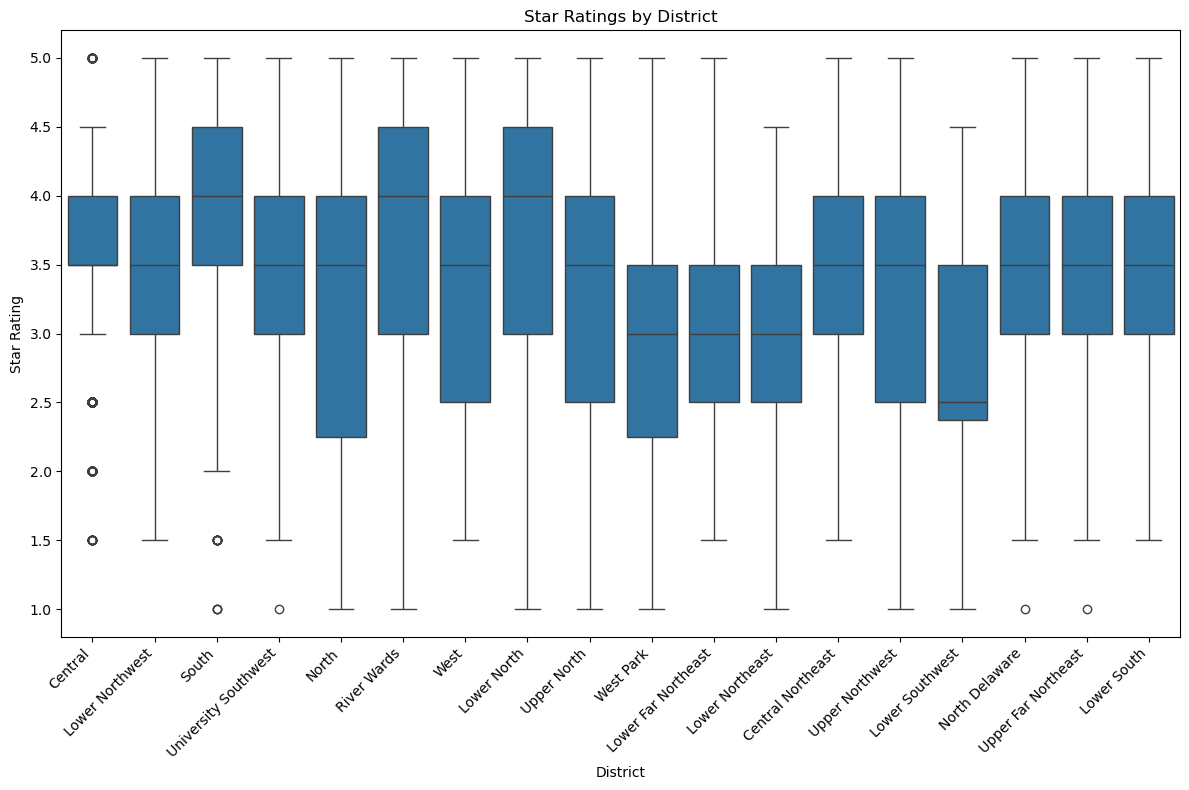

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'district' and 'stars' columns exist in check_df
if 'district' in check_df.columns and 'stars' in check_df.columns:
    # Filter the data to remove NaN values in 'district' or 'stars'
    plot_data = check_df.dropna(subset=['district', 'stars'])

    # Plot the data
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=plot_data, x='district', y='stars')
    plt.title('Star Ratings by District')
    plt.xlabel('District')
    plt.ylabel('Star Rating')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'district' and 'stars' are not in the DataFrame.")



In [72]:
# Identify numeric columns
numeric_cols = check_df.select_dtypes(include=['number']).columns

# Group by 'district' and calculate the mean for numeric columns and count for all columns
summary_df = check_df.groupby(['district'])[numeric_cols].mean().reset_index()

# Add count for each district
summary_df['count'] = check_df.groupby('district').size().values

# Display the result
summary_df


,district,latitude,longitude,stars,review_count,is_open,count
0,Central,39.951212,-75.159795,3.633534,176.576305,0.487550,2490
1,Central Northeast,40.057196,-75.066702,3.355263,40.625000,0.736842,152
2,Lower Far Northeast,40.076444,-75.000461,3.137681,50.601449,0.681159,138
3,Lower North,39.977103,-75.154124,3.629771,72.301527,0.667939,262
4,Lower Northeast,40.035383,-75.090287,3.029412,31.696078,0.745098,102
5,Lower Northwest,40.028815,-75.217643,3.562963,99.485185,0.562963,270
6,Lower South,39.903934,-75.171741,3.464286,70.214286,0.880952,42
7,Lower Southwest,39.894053,-75.237682,2.798077,54.009615,0.817308,104
8,North,40.009340,-75.141863,3.144144,34.549550,0.864865,111
9,North Delaware,40.036565,-75.038332,3.334395,44.184713,0.808917,157


# ENCODING

true/false cols

In [75]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# List of columns to encode (14 to 41), excluding specified columns
columns_to_encode = [col for col in check_df.columns[13:42] if col not in categorical_cols2]

# Replace 'None', pd.NA (missing), and 'missing' with 'False' for binary columns
check_df[columns_to_encode] = check_df[columns_to_encode].replace(['None', pd.NA, None, 'missing'], 'False')

# Create a OneHotEncoder object with drop='if_binary' to handle binary columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary')

# Fit and transform the selected columns, maintaining the original index
encoded_data = encoder.fit_transform(check_df[columns_to_encode])

# Create a new DataFrame with the encoded columns, setting the original index
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode), index=check_df.index)

# Concatenate the encoded DataFrame with the original DataFrame (excluding the encoded columns)
encoded = pd.concat([check_df.drop(columns=columns_to_encode), encoded_df], axis=1)



In [76]:
encoded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,RestaurantsPriceRange2,WiFi,RestaurantsAttire,NoiseLevel,district,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,Caters_True,RestaurantsReservations_True,RestaurantsGoodForGroups_True,HasTV_True,GoodForKids_True,Ambience_touristy_True,Ambience_hipster_True,Ambience_romantic_True,Ambience_divey_True,Ambience_intimate_True,Ambience_trendy_True,Ambience_upscale_True,Ambience_classy_True,Ambience_casual_True,Parking_garage_True,Parking_street_True,Parking_validated_True,Parking_lot_True,Parking_valet_True
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,free,casual,average,Central,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2,free,casual,average,Central,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,no,casual,quiet,Central,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2,free,casual,average,Central,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",1,no,casual,average,Lower Northwest,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


scaled cols

In [78]:
# Ordinal encoding for 'NoiseLevel': 0 = quiet, 1 = average, 2 = loud, 3 = very loud
noise_mapping = {'quiet': 0, 'average': 1, 'loud': 2, 'very_loud': 3}
encoded['NoiseLevel'] = encoded['NoiseLevel'].map(noise_mapping).fillna(1)

encoding hours column

In [80]:
# Define the encode_hours function to categorize the hours
def encode_hours(hours):
    try:
        # Split the hours into opening and closing times
        opening, closing = hours.split('-')
        # Convert times to integers for comparison
        open_hour = int(opening.split(':')[0])
        close_hour = int(closing.split(':')[0])
    except ValueError:
        return 0, 0, 0  # In case the format is incorrect, return zeros

    # Determine morning, midday, night based on opening and closing times
    morning = 1 if open_hour < 12 else 0
    midday = 1 if 12 <= open_hour < 18 else 0
    night = 1 if close_hour >= 18 else 0

    return morning, midday, night

# Define the encode_day function to handle encoding for a single day
def encode_day(day_hours):
    if day_hours == 'Closed' or pd.isna(day_hours):
        return 0, 0, 0  # Return zeros if the business is closed or hours are missing
    return encode_hours(day_hours)

# Now apply the functions to the DataFrame
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    encoded[f'{day}_morning'] = encoded['hours'].apply(lambda h: encode_day(h.get(day, 'Closed'))[0] if isinstance(h, dict) else 0)
    encoded[f'{day}_midday'] = encoded['hours'].apply(lambda h: encode_day(h.get(day, 'Closed'))[1] if isinstance(h, dict) else 0)
    encoded[f'{day}_night'] = encoded['hours'].apply(lambda h: encode_day(h.get(day, 'Closed'))[2] if isinstance(h, dict) else 0)

# Display the first few rows of the updated DataFrame
print(encoded.head())


               business_id                name        address          city  \
3   MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries    935 Race St  Philadelphia   
15  MUTTqe8uqyMdBl186RmNeA            Tuna Bar    205 Race St  Philadelphia   
19  ROeacJQwBeh05Rqg7F6TCg                 BAP  1224 South St  Philadelphia   
28  QdN72BWoyFypdGJhhI5r7g             Bar One   767 S 9th St  Philadelphia   
31  Mjboz24M9NlBeiOJKLEd_Q    DeSandro on Main   4105 Main St  Philadelphia   

   state postal_code   latitude  longitude  stars  review_count  is_open  \
3     PA       19107  39.955505 -75.155564    4.0            80        1   
15    PA       19106  39.953949 -75.143226    4.0           245        1   
19    PA       19147  39.943223 -75.162568    4.5           205        1   
28    PA       19147  39.939825 -75.157447    4.0            65        0   
31    PA       19127  40.022466 -75.218314    3.0            41        0   

                                           categories  \
3   Restaur

label encoded cols

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in label_cols:
    encoded[col + '_encoded'] = label_encoder.fit_transform(encoded[col])

encoded

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,RestaurantsPriceRange2,WiFi,RestaurantsAttire,NoiseLevel,district,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,Caters_True,RestaurantsReservations_True,RestaurantsGoodForGroups_True,HasTV_True,GoodForKids_True,Ambience_touristy_True,Ambience_hipster_True,Ambience_romantic_True,Ambience_divey_True,Ambience_intimate_True,Ambience_trendy_True,Ambience_upscale_True,Ambience_classy_True,Ambience_casual_True,Parking_garage_True,Parking_street_True,Parking_validated_True,Parking_lot_True,Parking_valet_True,Monday_morning,Monday_midday,Monday_night,Tuesday_morning,Tuesday_midday,Tuesday_night,Wednesday_morning,Wednesday_midday,Wednesday_night,Thursday_morning,Thursday_midday,Thursday_night,Friday_morning,Friday_midday,Friday_night,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,free,casual,1,Central,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",2,free,casual,1,Central,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",1,no,casual,0,Central,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",2,free,casual,1,Central,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",1,no,casual,1,Lower Northwest,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,0,"Restaurants, Food Stands",None,1,no,casual,1,University Southwest,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12
150298,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,0,"Sandwiches, Restaurants, Italian","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",1,free,casual,0,Upper Northwest,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,15
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"Restaurants, Specialty Food, Food, Sandw

Upper Far Northeast:
19114, 19115, 19116, 19154

Lower Far Northeast:
19111, 19136, 19149, 19152, 19135

Lower Northwest:
19118, 19119, 19127, 19128, 19129

Lower Southwest:
19142, 19153

University Southwest:
19104, 19139, 19143, 19151

West Park:
19131

Lower Northeast:
19124, 19137

River Wards:
19122, 19123, 19125, 19133, 19134

Lower North:
19121, 19132

North:
19140, 19141, 19144

Central:
19102, 19103, 19106, 19107, 19130

South:
19145, 19146, 19147, 19148

Lower South:
19112

Upper North:
19126, 19138, 19150


In [84]:
# Legend
for col in label_cols:
    unique_values = list(encoded[col].unique())
    label_mapping = dict(zip(label_encoder.fit(unique_values).transform(unique_values), unique_values))
    print(f"Label Encoding for '{col}': {label_mapping}")

Label Encoding for 'WiFi': {0: 'free', 1: 'no', 2: 'paid'}
Label Encoding for 'RestaurantsAttire': {0: 'casual', 1: 'dressy', 2: 'formal'}
Label Encoding for 'district': {0: 'Central', 5: 'Lower Northwest', 11: 'South', 12: 'University Southwest', 8: 'North', 10: 'River Wards', 16: 'West', 3: 'Lower North', 14: 'Upper North', 17: 'West Park', 2: 'Lower Far Northeast', 4: 'Lower Northeast', 1: 'Central Northeast', 15: 'Upper Northwest', 7: 'Lower Southwest', 9: 'North Delaware', 13: 'Upper Far Northeast', 6: 'Lower South'}


In [86]:
ready_df = encoded.drop(columns = ["hours", 'WiFi','RestaurantsAttire','district','postal_code','longitude','latitude'])

In [88]:
pd.set_option('display.max_columns', None)
ready_df.head()

,business_id,name,address,city,state,stars,review_count,is_open,categories,RestaurantsPriceRange2,NoiseLevel,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,Caters_True,RestaurantsReservations_True,RestaurantsGoodForGroups_True,HasTV_True,GoodForKids_True,Ambience_touristy_True,Ambience_hipster_True,Ambience_romantic_True,Ambience_divey_True,Ambience_intimate_True,Ambience_trendy_True,Ambience_upscale_True,Ambience_classy_True,Ambience_casual_True,Parking_garage_True,Parking_street_True,Parking_validated_True,Parking_lot_True,Parking_valet_True,Monday_morning,Monday_midday,Monday_night,Tuesday_morning,Tuesday_midday,Tuesday_night,Wednesday_morning,Wednesday_midday,Wednesday_night,Thursday_morning,Thursday_midday,Thursday_night,Friday_morning,Friday_midday,Friday_night,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",1,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,245,1,"Sushi Bars, Restaurants, Japanese",2,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,205,1,"Korean, Restaurants",1,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",2,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,3.0,41,0,"Pizza, Restaurants, Salad, Soup",1,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,5


In [90]:
ready_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'stars',
       'review_count', 'is_open', 'categories', 'RestaurantsPriceRange2',
       'NoiseLevel', 'RestaurantsDelivery_True', 'OutdoorSeating_True',
       'BusinessAcceptsCreditCards_True', 'BikeParking_True',
       'RestaurantsTakeOut_True', 'Caters_True',
       'RestaurantsReservations_True', 'RestaurantsGoodForGroups_True',
       'HasTV_True', 'GoodForKids_True', 'Ambience_touristy_True',
       'Ambience_hipster_True', 'Ambience_romantic_True',
       'Ambience_divey_True', 'Ambience_intimate_True', 'Ambience_trendy_True',
       'Ambience_upscale_True', 'Ambience_classy_True', 'Ambience_casual_True',
       'Parking_garage_True', 'Parking_street_True', 'Parking_validated_True',
       'Parking_lot_True', 'Parking_valet_True', 'Monday_morning',
       'Monday_midday', 'Monday_night', 'Tuesday_morning', 'Tuesday_midday',
       'Tuesday_night', 'Wednesday_morning', 'Wednesday_midday',
       'Wednesday_night', 'Thur

In [92]:
hours_cols = ['Monday_morning','Monday_midday','Monday_night',
              'Tuesday_morning', 'Thursday_night', 'Friday_morning',
              'Friday_midday', 'Friday_night',
       'Saturday_morning', 'Saturday_midday', 'Saturday_night',
       'Sunday_morning', 'Sunday_midday', 'Sunday_night']


for col in hours_cols:
    print(f"Unique values in '{col}': {encoded[col].unique()}")

for column in ordinal_cols:
    print(f"Unique values in '{column}': {encoded[column].unique()}")

for column in ["WiFi_encoded", "RestaurantsAttire_encoded"]:
    print(f"Unique values in '{column}': {encoded[column].unique()}")

Unique values in 'Monday_morning': [1 0]
Unique values in 'Monday_midday': [0 1]
Unique values in 'Monday_night': [1 0]
Unique values in 'Tuesday_morning': [1 0]
Unique values in 'Thursday_night': [1 0]
Unique values in 'Friday_morning': [1 0]
Unique values in 'Friday_midday': [0 1]
Unique values in 'Friday_night': [1 0]
Unique values in 'Saturday_morning': [1 0]
Unique values in 'Saturday_midday': [0 1]
Unique values in 'Saturday_night': [1 0]
Unique values in 'Sunday_morning': [1 0]
Unique values in 'Sunday_midday': [0 1]
Unique values in 'Sunday_night': [1 0]
Unique values in 'RestaurantsPriceRange2': ['1' '2' '3' '4']
Unique values in 'NoiseLevel': [1 0 2 3]
Unique values in 'WiFi_encoded': [0 1 2]
Unique values in 'RestaurantsAttire_encoded': [0 1 2]


In [94]:
ready_df = ready_df.drop(15272)

#working on it
from geopy.distance import geodesic
import pandas as pd

# List of ZIP codes with approximate locations (replace with actual latitude/longitude if available)
zip_locations = {
    "19107": (39.9526, -75.1652),
    "19106": (39.9474, -75.1513),
    "19147": (39.9338, -75.1636),
    "19127": (40.0276, -75.2236),
    "19123": (39.9626, -75.1484),
    "19146": (39.9392, -75.1803),
    # Add more ZIP codes here with their approximate locations
}

# Define landmarks with their coordinates
landmarks = {
    "Independence Hall": (39.9489, -75.1500),
    "Philadelphia Museum of Art": (39.9656, -75.1802),
    "Citizens Bank Park": (39.9061, -75.1665),
    "University of Pennsylvania": (39.9522, -75.1932),
}

# Calculate proximity of ZIP codes to each landmark
proximity_results = []
for zip_code, zip_coords in zip_locations.items():
    for landmark, landmark_coords in landmarks.items():
        distance = geodesic(zip_coords, landmark_coords).miles
        proximity_results.append({"ZIP Code": zip_code, "Landmark": landmark, "Distance (miles)": distance})

# Create a DataFrame for sorting and analysis
proximity_df = pd.DataFrame(proximity_results)

# Sort by landmark and distance
sorted_proximity_df = proximity_df.sort_values(by=["Landmark", "Distance (miles)"])


In [103]:
import pandas as pd
import scipy.stats as stats

# Perform one-way ANOVA
anova_result = stats.f_oneway(
    *[ready_df[ready_df['district_encoded'] == cat]['stars'] for cat in ready_df['district_encoded'].unique()]
)

anova_result


F_onewayResult(statistic=25.034167037609045, pvalue=7.61433912184162e-77)

In [105]:
# Check for missing values (NaN) in the entire dataframe
missing_values = ready_df.isnull().sum()

# Check for empty string values in the entire dataframe
empty_strings = (ready_df == '').sum()

# Combine the two checks to get the total number of missing or empty entries per column
total_missing = missing_values + empty_strings

# Display columns with missing or empty values
missing_columns = total_missing[total_missing > 0]

print("Columns with missing or empty entries:")
print(missing_columns)

Columns with missing or empty entries:
Series([], dtype: int64)


In [107]:
ready_df.to_json('prepped_business.json')